In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
def no_index_read():
    def func(input:str):
        return pd.read_csv(input,index_col=None,header=None)
    return func
read_csv = no_index_read()

test_in = read_csv("test_in.csv")
test_out = read_csv("test_out.csv")
train_in = read_csv("train_in.csv")
train_out = read_csv("train_out.csv")
digits = sorted(list(set(train_out.values.flatten())))

train_in.shape

(1707, 256)

---
![Perceptron Model](../img/perceptron.png)

In [3]:
#DATA PREP
df_x = train_in.copy(deep=True)
df_x["bias"] = 1 # extend by [1...1] for bias term
x = df_x.values

df_x_test = test_in.copy(deep=True)
df_x_test["bias"] = 1  # extend by [1...1] for bias term
x_test = df_x_test.values

y_real = train_out.values.flatten()
y_test_real = test_out.values.flatten()

in_shape = x.shape[1]
out_shape = len(digits)
np.random.seed=(42)
w = np.random.random([in_shape,out_shape])

In [4]:
# PERCEPTRON WITH argmax
def perceptron(x:np.ndarray,weights:np.ndarray):
    if not isinstance(x,np.ndarray):
        print("x should be an ndarray")
        return 
    assert(isinstance(x,np.ndarray))
    return np.argmax(np.dot(x,weights),axis=1)
x.shape,w.shape,train_out.shape,perceptron(x,w).shape,"shapes look good!"

((1707, 257), (257, 10), (1707, 1), (1707,), 'shapes look good!')

In [14]:
# ERROR FUNCTION
y = perceptron(x,w)

def loss(y_pred,y_real):
    return np.sum((y_real-y_pred)**2)
def accuracy(y_pred,y_real):
    return 100*np.mean(y_pred==y_real)

loss(y,y_real),accuracy(y,y_real)

(31265, 4.452255418863503)

In [9]:
#GRADIENTS & UPDATE RULE
def gradients(x,w,y):
    # for one input x we have  L(x)= Σ(i)(y- w(i)*x(i))^2 ->
    # for each wi we get gradiend(L) with regard to wi = -2*xi
    # which means the total gradient = -2*x(y-wixi)
    # so an average gradient for all the dataset would be -2*avg(x)
    # so sum over 1700 x's and divide with x.shape[1] (257) so also bias wieght
    targets = np.zeros((x.shape[0],w.shape[1]))
    trues = targets.copy()

    preds = perceptron(x,w)                     # format: 6

    targets[np.arange(preds.size),preds]=1
    trues[np.arange(y.size),y]=1                # format: [0,0,0,0,0,0,1,0,0,0]

    diff = targets-trues
    x_diff =  x.T @ diff                        # (257,1707)x(1707,10) --> (257,10) weight shape
    avg = x_diff/x.shape[1]                     # average over 1707
    return 2*avg

def grad_generator(x,y_real):   # <-- gunction that returns a function
    def func(w):                # <--- this func will only take w
        return gradients(x,w,y_real)    # <-- but give the gradients with x and y_real in "mind"
    return func
grad = grad_generator(x,y_real)                 # function to calculate the grads by only taking the weights

def weight_update(w,lr=0.1):
    g = grad(w)
    update = -lr*g
    return w + update

In [25]:
#TRAINING
lr = 0.6
def train(w):
    hist = []
    acc_hist =[]
    y_pred = perceptron(x,w)
    l = loss(y_pred,y_real)
    limit = 1000
    loss_goal = 0
    for _ in tqdm(range(limit)):
        w = weight_update(w,lr)
        y_pred = perceptron(x,w)
        l = loss(y_pred,y_real)
        y_test_pred = perceptron(x_test,w)
        l_test = loss(y_test_pred,y_test_real)
        acc = accuracy(y_pred,y_real)
        acc_test = accuracy(y_test_pred,y_test_real)
        hist.append((l,l_test))
        acc_hist .append((acc,acc_test))
        if l<=loss_goal:
            break
    l = hist[-1]
    print(f"Achieved loss {l[0]} in {len(hist)} epochs with lr={lr}")
    return w,hist,acc_hist
w_trained, hist , acc_hist = train(w.copy())

  0%|          | 0/1000 [00:00<?, ?it/s]

Achieved loss 0 in 269 epochs with lr=0.6


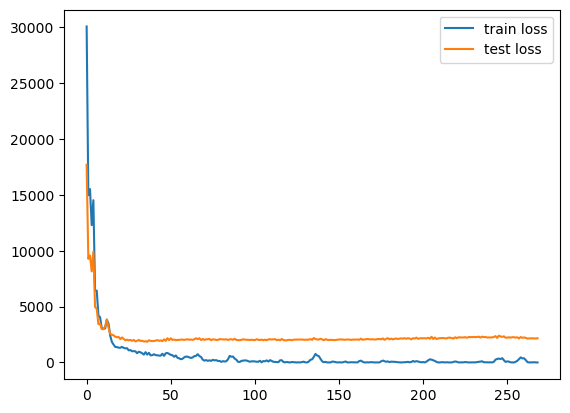

In [29]:
plt.plot(hist)
# plt.yscale('log')
plt.legend(["train loss","test loss"])
plt.show()

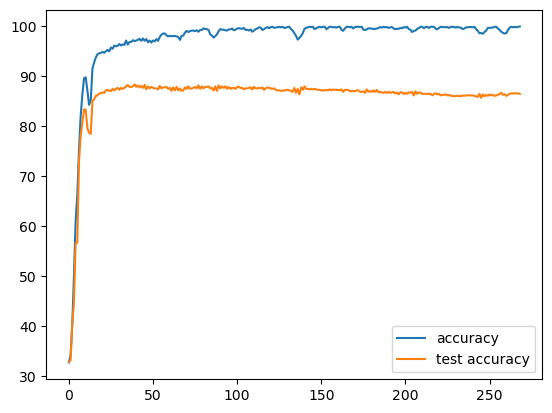

In [31]:
plt.plot(acc_hist)
plt.legend(["accuracy","test accuracy"])
plt.show()